# Forecasting

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

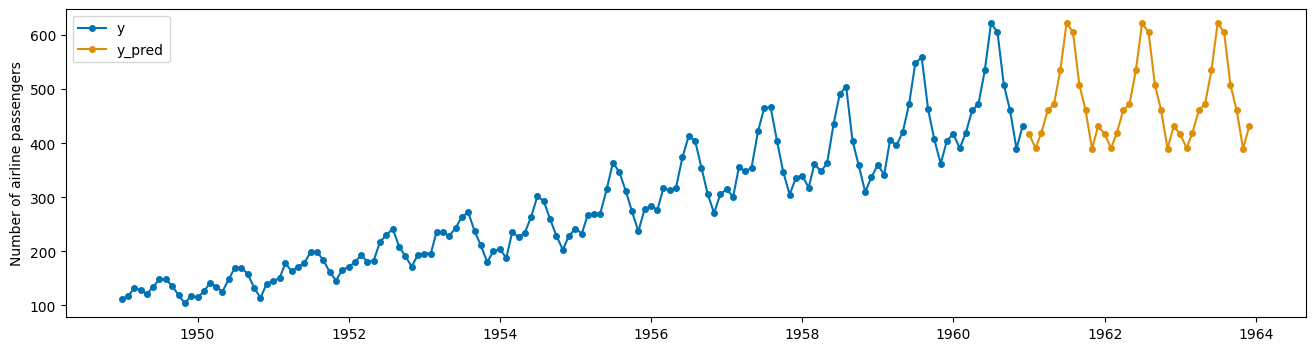

In [2]:
# Naive Forecaster with airline datset
from sktime.datasets import load_airline
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series

y = load_airline()

# specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# fitting the forecaster
forecaster.fit(y)

# querying predictions
y_pred = forecaster.predict(fh=range(1,37))

# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

### Observations:
* NaiveForecaster can not cope with trends. Detrending algorithm is needed.

sktime enables to build pipelines consisting of transformations and estimators (e.g. forecasters).


## Building Pipelines with sktime

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

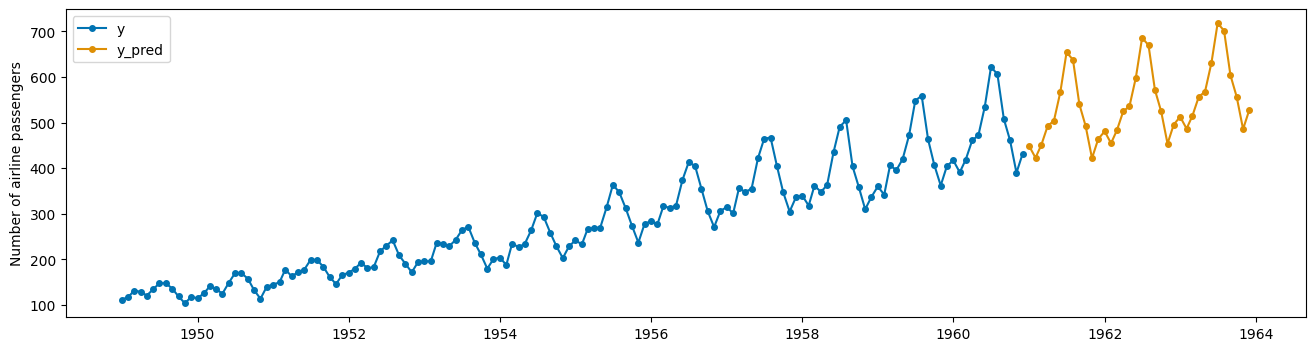

In [ ]:
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender

y = load_airline()

pipe_y = TransformedTargetForecaster(
    steps=[
        ("detrend", Detrender()),
        ("deseasonalize", Deseasonalizer()),
        ("forecaster", NaiveForecaster(strategy="last", sp=12)),
    ]
)


pipe_y.fit(y=y)
y_pred = pipe_y.predict(fh=range(1,37))

plot_series(y, y_pred, labels=["y", "y_pred"])

In [ ]:
# TODO add ForecastingPipeline example?

## Global Forecasting

![](./img/local_vs_global.png)

### Advantages and Disadvantages



### Global Forecasting Models in sktime

sktime implements and interfaces several global forecaster, we are using tags to identify capabilities of estimators like global forecasting. 
With these tags, you can find them on our homepage:
# TODO add an image if this is fixed!

Alternatively, you can also check this via code.

In [18]:
from sktime.registry import all_estimators
# return all forecasters which handle missing data in the input by tag filtering
all_estimators("forecaster", filter_tags={"capability:global_forecasting": True}, as_dataframe=True) 

/Users/benediktheidrich/code/tutorial_haicon_prologue_2025/venv/lib/python3.11/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


,name,object
0,ChronosForecaster,<class 'sktime.forecasting.chronos.ChronosFore...
1,MOIRAIForecaster,<class 'sktime.forecasting.moirai_forecaster.M...
2,NeuralForecastDilatedRNN,<class 'sktime.forecasting.neuralforecast.Neur...
3,NeuralForecastGRU,<class 'sktime.forecasting.neuralforecast.Neur...
4,NeuralForecastLSTM,<class 'sktime.forecasting.neuralforecast.Neur...
5,NeuralForecastRNN,<class 'sktime.forecasting.neuralforecast.Neur...
6,NeuralForecastTCN,<class 'sktime.forecasting.neuralforecast.Neur...
7,PytorchForecastingDeepAR,<class 'sktime.forecasting.pytorchforecasting....
8,PytorchForecastingNBeats,<class 'sktime.forecasting.pytorchforecasting....
9,PytorchForecastingNHiTS,<class 'sktime.forecasting.pytorchforecasting....


In [19]:
# Global forecasting models. E.g. use NBEATS or DeepAR.
from sktime.datasets import load_forecastingdata 

from sktime.forecasting.pytorchforecasting import PytorchForecastingNBeats

def dataset_loader():
    data = load_forecastingdata("australian_electricity_demand_dataset", return_type="pd_multiindex_hier")[0]
    data = data[data.index.get_level_values(-1) <  "2009.01.01"] #"2005.01.01"
    data.index = data.index.droplevel(0)
    return data

dataset_loader()


series_value
state timestamp                        
NSW   2002-01-01 00:00:00   5714.045004
      2002-01-01 00:30:00   5360.189078
      2002-01-01 01:00:00   5014.835118
      2002-01-01 01:30:00   4602.755516
      2002-01-01 02:00:00   4285.179828
...                                 ...
TAS   2008-12-31 21:30:00    419.658862
      2008-12-31 22:00:00    401.594288
      2008-12-31 22:30:00    392.008622
      2008-12-31 23:00:00    375.544740
      2008-12-31 23:30:00    362.703306

[613680 rows x 1 columns]

<style>
table th:first-of-type {
    width: 30%;
}
table th:nth-of-type(2) {
    width: 60%;
}
</style>

| Panel Data: <br /> Representing half hourly electricity demand of  5 time series of five states in Australia: (Victoria, New South Wales, Queensland, Tasmania, South Australia) | ![](./img/explanation_panel_data.png) |
:-----------------:|:-------------------------:


Global forecaster should be able to predict all time series, even if predicted only on a subset!

In [30]:
data = dataset_loader()
set(data.index.get_level_values(0))

{'NSW', 'QUN', 'SA', 'TAS', 'VIC'}

In [ ]:
y_train = data.loc[["NSW", "QUN", "SA", "TAS"]]
y_test = data.loc["VIC"]

In [33]:
y_train

series_value
state timestamp                        
NSW   2002-01-01 00:00:00   5714.045004
      2002-01-01 00:30:00   5360.189078
      2002-01-01 01:00:00   5014.835118
      2002-01-01 01:30:00   4602.755516
      2002-01-01 02:00:00   4285.179828
...                                 ...
TAS   2008-12-31 21:30:00    419.658862
      2008-12-31 22:00:00    401.594288
      2008-12-31 22:30:00    392.008622
      2008-12-31 23:00:00    375.544740
      2008-12-31 23:30:00    362.703306

[490944 rows x 1 columns]

In [34]:
y_test

,series_value
timestamp,
2002-01-01 00:00:00,3535.867064
2002-01-01 00:30:00,3383.499028
2002-01-01 01:00:00,3655.527552
2002-01-01 01:30:00,3510.446636
2002-01-01 02:00:00,3294.697156
...,...
2008-12-31 21:30:00,3705.159210
2008-12-31 22:00:00,3698.903656
2008-12-31 22:30:00,3711.339458


/Users/benediktheidrich/code/tutorial_haicon_prologue_2025/venv/lib/python3.11/site-packages/sktime/forecasting/base/adapters/_pytorchforecasting.py:509: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["_target_column"].fillna(0, inplace=True)
/Users/benediktheidrich/code/tutorial_haicon_prologue_2025/venv/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperpar

/Users/benediktheidrich/code/tutorial_haicon_prologue_2025/venv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/benediktheidrich/code/tutorial_haicon_prologue_2025/venv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 4: 100%|██████████| 100/100 [00:03<00:00, 27.51it/s, v_num=15, train_loss_step=4.330, val_loss=3.980, train_loss_epoch=4.270]  

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 100/100 [00:03<00:00, 26.99it/s, v_num=15, train_loss_step=4.330, val_loss=3.980, train_loss_epoch=4.270]


/Users/benediktheidrich/code/tutorial_haicon_prologue_2025/venv/lib/python3.11/site-packages/sktime/forecasting/base/adapters/_pytorchforecasting.py:655: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  _y.fillna(0, inplace=True)
/Users/benediktheidrich/code/tutorial_haicon_prologue_2025/venv/lib/python3.11/site-packages/sktime/forecasting/base/adapters/_pytorchforecasting.py:509: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inpla

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='series_value'>)

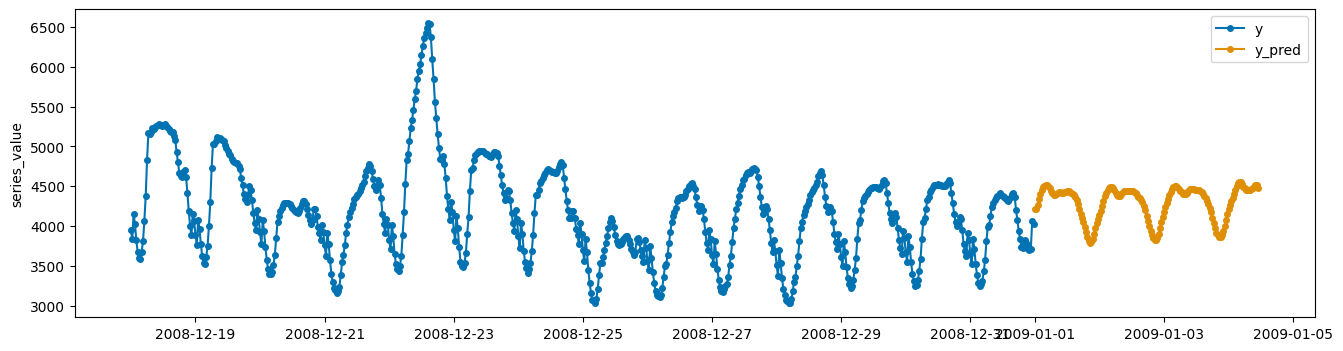

In [40]:

# define the model
model = PytorchForecastingNBeats(
     trainer_params={
         "max_epochs": 5,  # for quick test
         "limit_train_batches": 100,  # for quick test
     },
 )
# fit and predict
model.fit(y=y_train, fh=range(1, 168))

y_pred = model.predict(y=y_test, fh=range(1,168))
plot_series(y_test[-4*168:], y_pred, labels=["y", "y_pred"])


### Time Series Foundation Models

* Foundation models are pretrained global models. **You need not to train them before applying them**
* We support different architectures:
  * Chronos/ChronosBolt
  * MOIRAI
  * TimesFM
  * TinyTimesMixer
  * ...

Weights are available via HuggingFace. 


![](./img/chronos_bolt.png)


/Users/benediktheidrich/code/tutorial_haicon_prologue_2025/venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/benediktheidrich/code/tutorial_haicon_prologue_2025/venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='series_value'>)

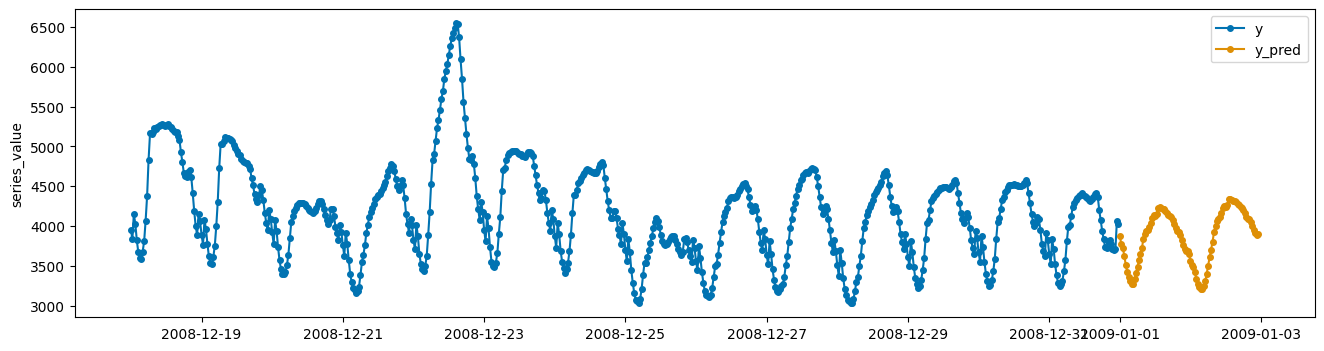

In [51]:

from sktime.forecasting.ttm import TinyTimeMixerForecaster

morai_forecaster = TinyTimeMixerForecaster(
     #checkpoint_path=f"sktime/moirai-1.0-R-small"
 )

# TODO check why MOIRAI fails to make any useful predictions here!

morai_forecaster.fit(y_train, fh=range(1, 48*2))

pred_moirai = morai_forecaster.predict(y=y_test)
plot_series(y_test[-4*168:], pred_moirai, labels=["y", "y_pred"])
